In [23]:
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns

In [24]:
df= pd.read_csv(r'D:\Data Science\Dataset\student Retension\student-por.csv', sep=';')

In [25]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


(array([ 16.,   0.,   1.,  13.,  70., 201., 154., 112.,  65.,  17.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

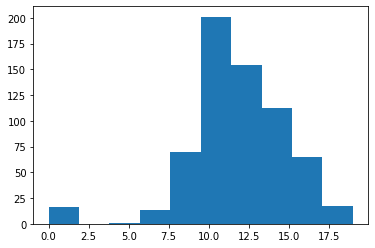

In [26]:
plt.hist((df['G3']))

In [27]:
numerical_columns=df.describe().columns

In [28]:
categorical_columns=[]
for i in df.columns:
    if i not in numerical_columns:
        categorical_columns.append(i)

In [29]:
for i in categorical_columns:
    print(i, ':', set(df[i]))

school : {'GP', 'MS'}
sex : {'F', 'M'}
address : {'R', 'U'}
famsize : {'LE3', 'GT3'}
Pstatus : {'A', 'T'}
Mjob : {'health', 'services', 'teacher', 'at_home', 'other'}
Fjob : {'health', 'services', 'teacher', 'at_home', 'other'}
reason : {'other', 'course', 'reputation', 'home'}
guardian : {'mother', 'father', 'other'}
schoolsup : {'no', 'yes'}
famsup : {'no', 'yes'}
paid : {'no', 'yes'}
activities : {'no', 'yes'}
nursery : {'no', 'yes'}
higher : {'no', 'yes'}
internet : {'no', 'yes'}
romantic : {'no', 'yes'}


In [30]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [31]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [32]:
df.shape

(649, 33)

In [33]:
for feat in categorical_columns:
    dummies = pd.get_dummies(df[feat]).rename(columns=lambda x: feat + '_' + str(x))
    df = pd.concat([df, dummies], axis=1)
    
df = df[[feat for feat in list(df) if feat not in categorical_columns]]

In [34]:
df.head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0


In [35]:
df.activities_no.unique()

array([1, 0], dtype=uint8)

### XGBOOST MODEL BUILDING

In [36]:
# create an xgboost model
# run simple xgboost classification model and check 
# prep modeling code
outcome = 'G3'
features = [feat for feat in list(df) if feat not in outcome]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                 df[outcome], 
                                                 test_size=0.3, 
                                                 random_state=42)


import xgboost  as xgb
xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train[features], y_train, feature_names = features)
dtest = xgb.DMatrix(X_test[features], y_test, feature_names = features)
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train (params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 2000,
              verbose_eval=50, 
              early_stopping_rounds = 500,
              evals=evals,
              #feval = f1_score_cust,
              maximize = False)

[23:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:11.64971	eval-rmse:11.94302
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 500 rounds.
[50]	train-rmse:7.20058	eval-rmse:7.40624
[100]	train-rmse:4.50631	eval-rmse:4.63594
[150]	train-rmse:2.90725	eval-rmse:2.99138
[200]	train-rmse:1.98567	eval-rmse:2.06537
[250]	train-rmse:1.47358	eval-rmse:1.56771
[300]	train-rmse:1.20603	eval-rmse:1.32743
[350]	train-rmse:1.06527	eval-rmse:1.22792
[400]	train-rmse:0.98898	eval-rmse:1.19130
[450]	train-rmse:0.94039	eval-rmse:1.17599
[500]	train-rmse:0.90536	eval-rmse:1.16880
[550]	train-rmse:0.87610	eval-rmse:1.16890
[600]	train-rmse:0.85171	eval-rmse:1.17095
[650]	train-rmse:0.83189	eval-rmse:1.17157
[700]	train-rmse:0.81395	eval-rmse:1.17366
[750]	train-rmse:0.79626	eval-rmse:

#### Find poor performing students and find out why they are so compared to their peers

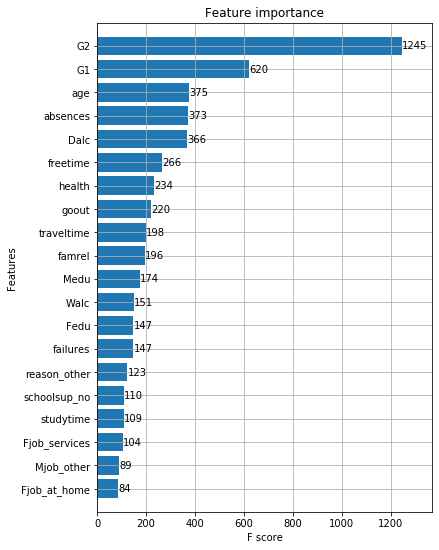

In [37]:
# plot the important features  
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=0.8, ax=ax, max_num_features=20)

plt.show()

In [38]:
# get dataframe version of important feature for model 
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

,feature,importance
0,G2,1245
1,G1,620
11,age,375
8,absences,373
5,Dalc,366
15,freetime,266
13,health,234
29,goout,220
38,traveltime,198
10,famrel,196


In [39]:
print(xgb_model.predict(dtest)[0:10])

[16.812277 11.550355 17.011883 11.075316 11.513776 16.314228 17.202692
 10.227154 10.892789 10.709685]


In [40]:
key_features = list(xgb_fea_imp['feature'].values[0:40])
key_features

['G2',
 'G1',
 'age',
 'absences',
 'Dalc',
 'freetime',
 'health',
 'goout',
 'traveltime',
 'famrel',
 'Medu',
 'Walc',
 'Fedu',
 'failures',
 'reason_other',
 'schoolsup_no',
 'studytime',
 'Fjob_services',
 'Mjob_other',
 'Fjob_at_home',
 'sex_F',
 'famsup_no',
 'school_GP',
 'guardian_father',
 'romantic_no',
 'Mjob_services',
 'Mjob_teacher',
 'famsize_GT3',
 'higher_no',
 'nursery_no',
 'activities_no',
 'reason_reputation',
 'reason_home',
 'internet_no',
 'reason_course',
 'address_R',
 'schoolsup_yes',
 'paid_no',
 'guardian_mother',
 'school_MS']

In [41]:
# Take students with a predicted final score of less than 10 over 20
predicted_students_in_trouble = X_test[X_test['G3'] < 10]

# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    print('Student ID:', index)
    for feat in key_features:
        if row[feat] < df[feat].quantile(0.25):
            print('\t', 'Below:', feat, row[feat], 'Class:', 
                  np.round(np.mean(df[feat]),2))
        if row[feat] > df[feat].quantile(0.75):
            print('\t','Above:', feat, row[feat], 'Class:', 
                  np.round(np.mean(df[feat]),2))

Student ID: 131
	 Below: G2 9 Class: 11.57
	 Above: absences 10 Class: 3.66
	 Above: goout 5 Class: 3.18
	 Above: failures 3 Class: 0.22
	 Above: Mjob_services 1 Class: 0.21
	 Above: higher_no 1 Class: 0.11
	 Above: reason_reputation 1 Class: 0.22
Student ID: 81
	 Below: G2 9 Class: 11.57
	 Below: age 15 Class: 16.74
	 Below: schoolsup_no 0 Class: 0.9
	 Above: studytime 3 Class: 1.93
	 Above: nursery_no 1 Class: 0.2
	 Above: reason_home 1 Class: 0.23
	 Above: schoolsup_yes 1 Class: 0.1
Student ID: 585
	 Below: G2 7 Class: 11.57
	 Below: G1 8 Class: 11.4
	 Below: freetime 2 Class: 3.18
	 Above: studytime 3 Class: 1.93
	 Above: Fjob_at_home 1 Class: 0.06
	 Above: higher_no 1 Class: 0.11
	 Above: internet_no 1 Class: 0.23
	 Below: paid_no 0 Class: 0.94
Student ID: 177
	 Below: G2 8 Class: 11.57
	 Below: G1 9 Class: 11.4
	 Below: Medu 1 Class: 2.51
	 Above: Walc 4 Class: 2.28
	 Above: failures 1 Class: 0.22
	 Above: guardian_father 1 Class: 0.24
	 Above: higher_no 1 Class: 0.11
Student ID:

Student ID: 131


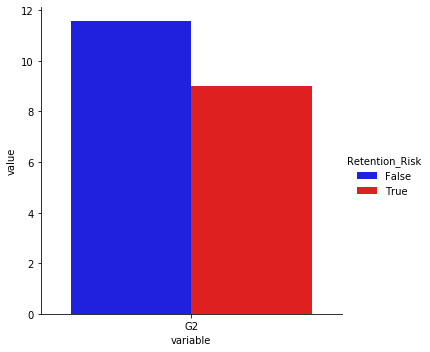

Student ID: 81


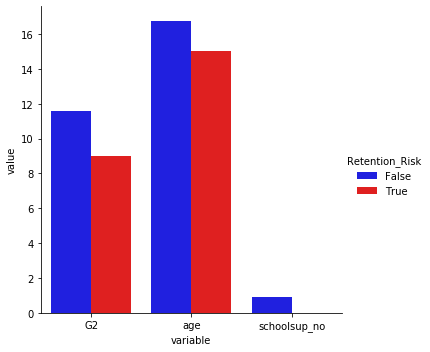

Student ID: 585


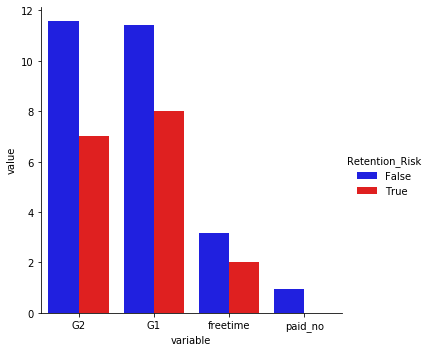

Student ID: 177


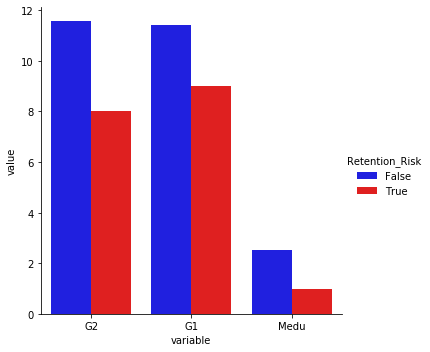

Student ID: 174


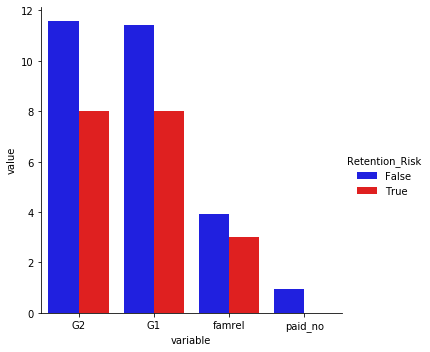

Student ID: 478


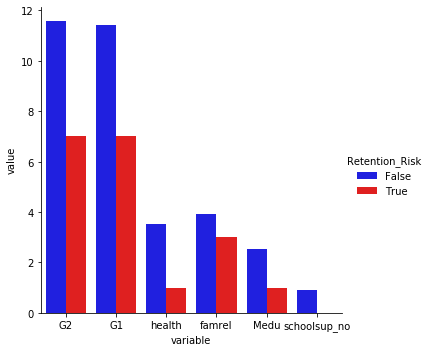

Student ID: 522


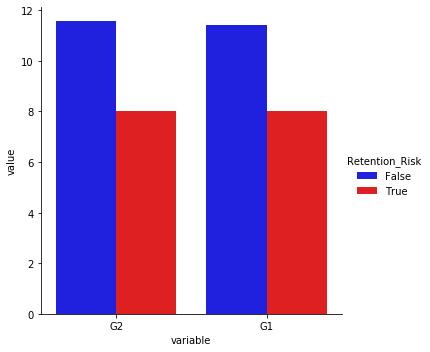

Student ID: 163


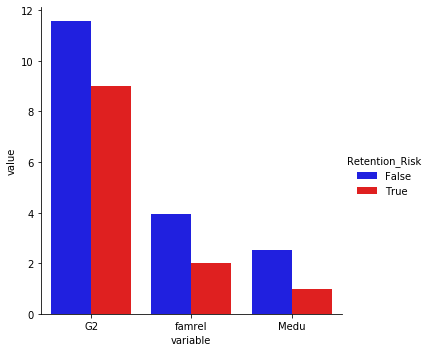

Student ID: 570


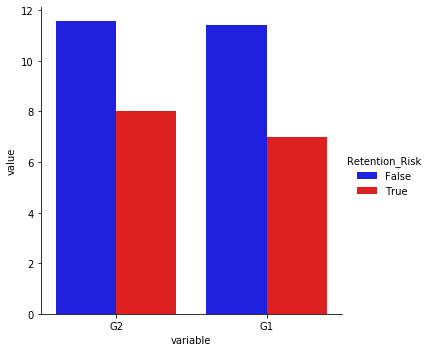

Student ID: 257


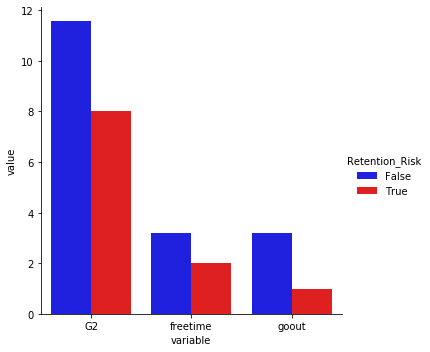

Student ID: 148


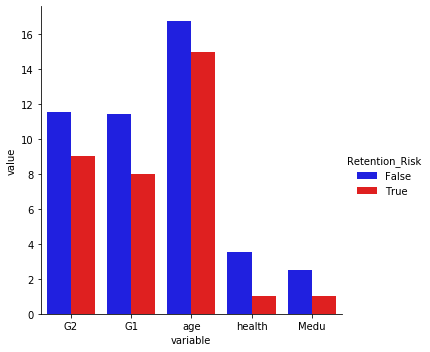

Student ID: 447


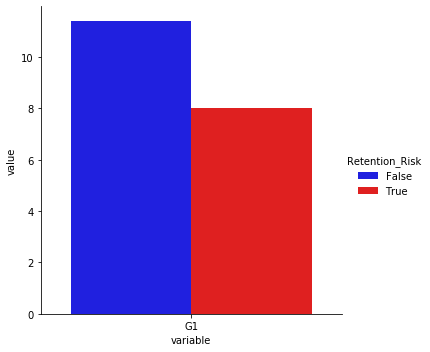

Student ID: 518


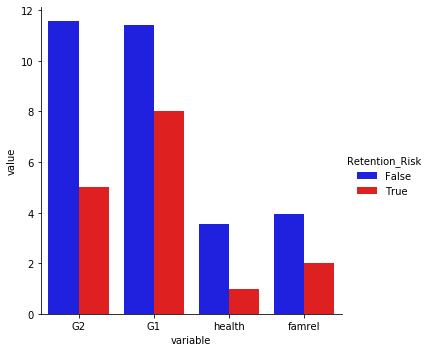

Student ID: 603


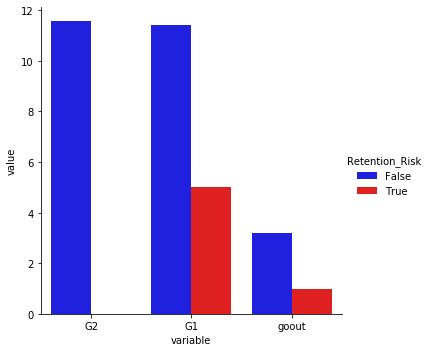

Student ID: 514


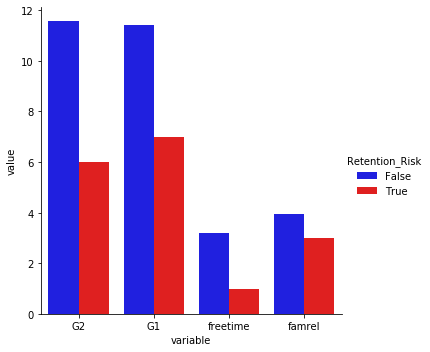

Student ID: 568


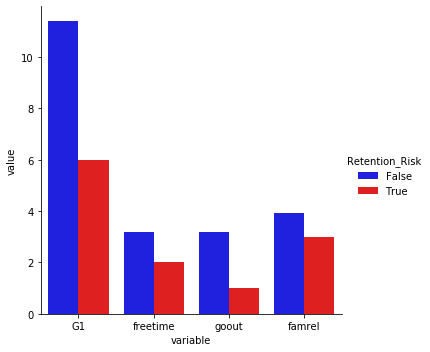

Student ID: 440


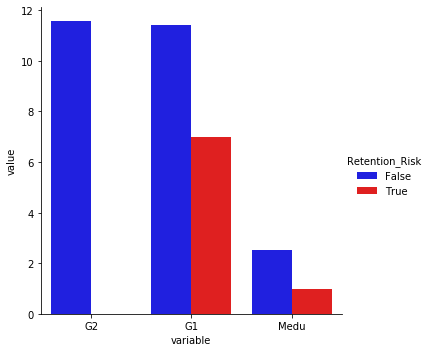

Student ID: 443


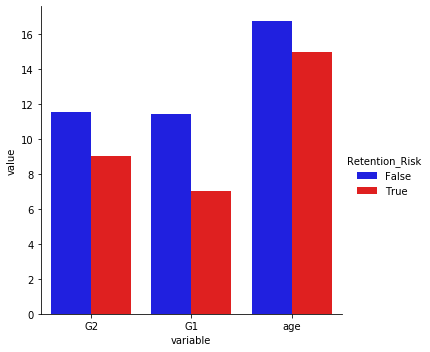

Student ID: 155


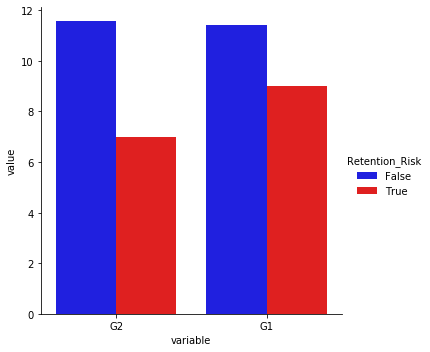

Student ID: 248


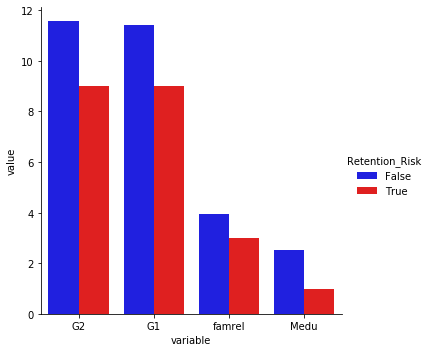

Student ID: 494


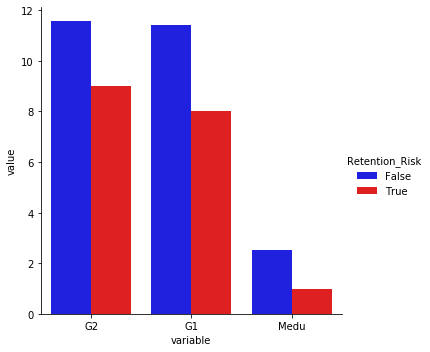

Student ID: 563


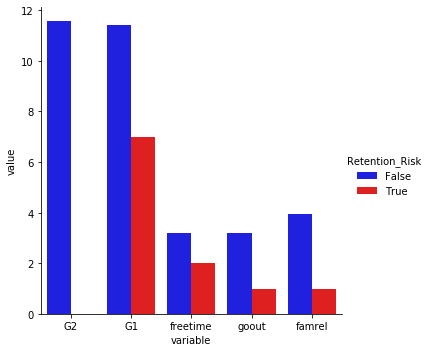

Student ID: 432


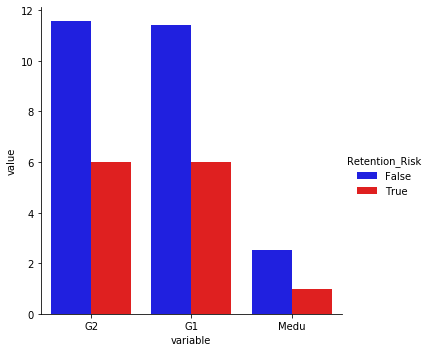

Student ID: 583


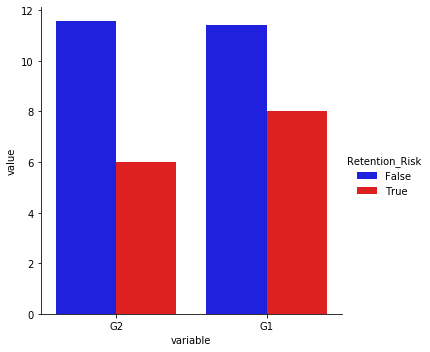

Student ID: 370


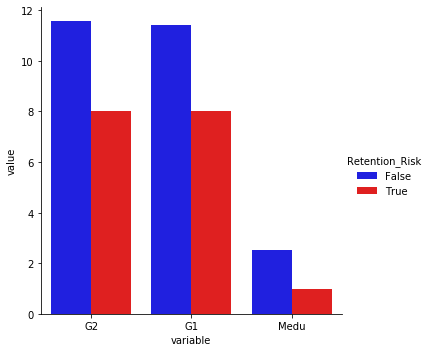

Student ID: 256


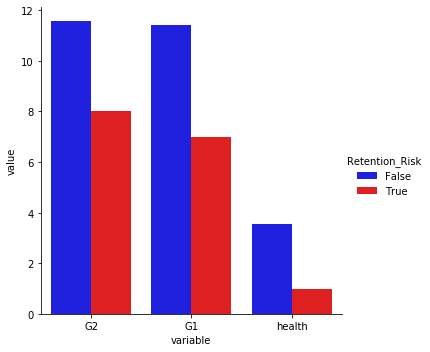

In [42]:
lower_limit_threshold = 0.25

# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    student_id = index
    important_low_features = []
 
    for feat in key_features:
        if row[feat] < df[feat].quantile(lower_limit_threshold):
            important_low_features.append(feat)
    
    # create new data set for this student
    at_risk_student = pd.DataFrame(row[important_low_features]).T
    at_risk_student['Retention_Risk'] = True
    student_mean = pd.DataFrame(df[important_low_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    student_profile = pd.concat([at_risk_student,student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
    
    print('Student ID:', student_id)
    sns.catplot(x='variable', y='value', hue='Retention_Risk',data=student_profile, kind='bar', 
                palette=sns.color_palette(['blue', 'red']))

    plt.show()

Student ID: 131


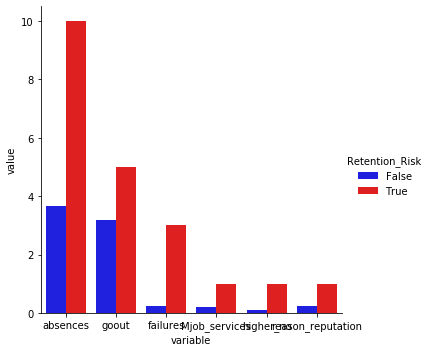

Student ID: 81


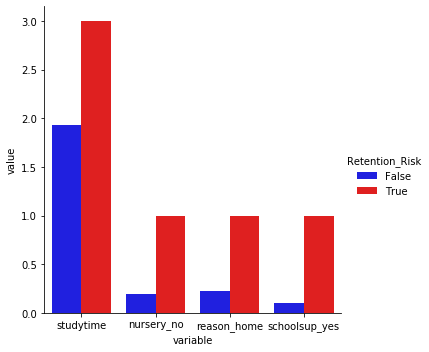

Student ID: 585


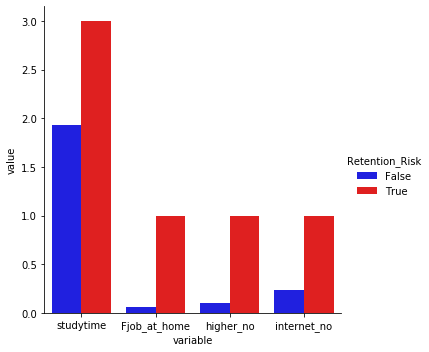

Student ID: 177


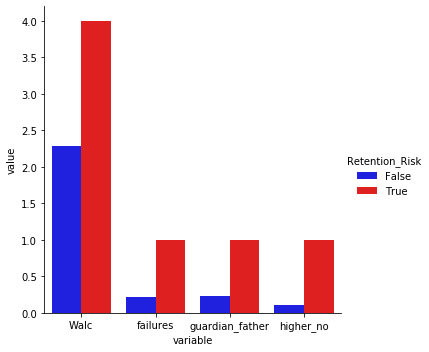

Student ID: 174


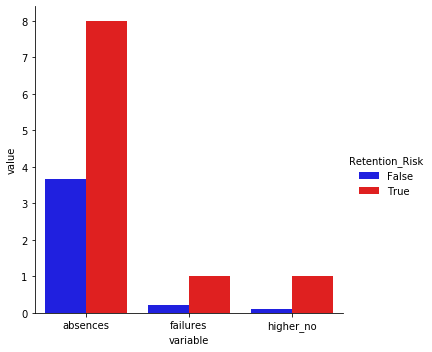

Student ID: 478


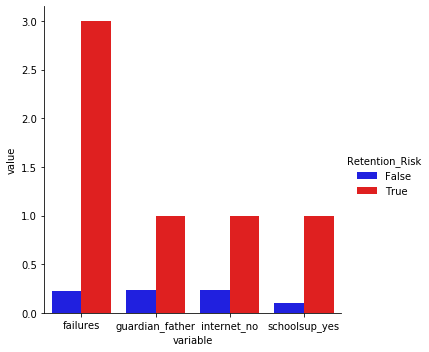

Student ID: 522


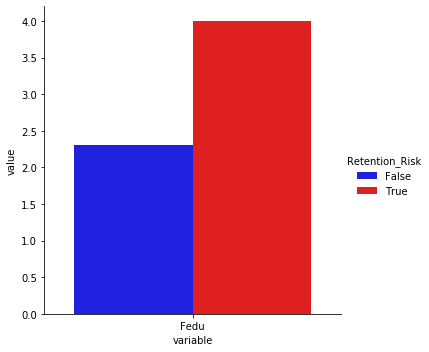

Student ID: 163


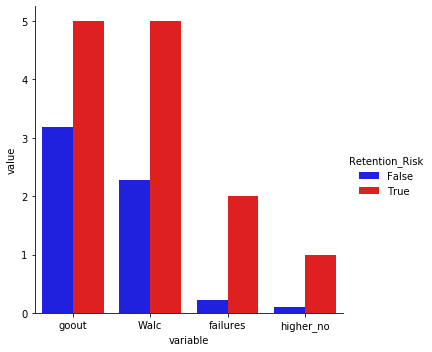

Student ID: 570


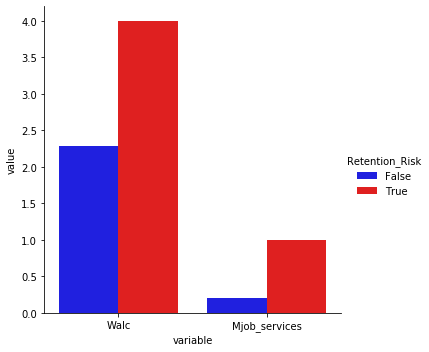

Student ID: 257


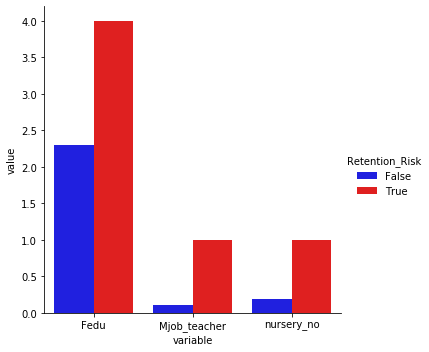

Student ID: 148


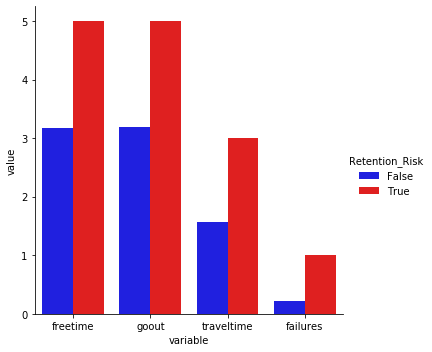

Student ID: 447


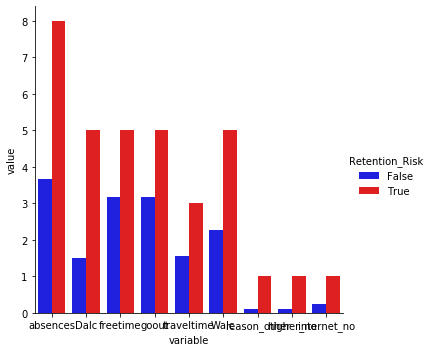

Student ID: 518


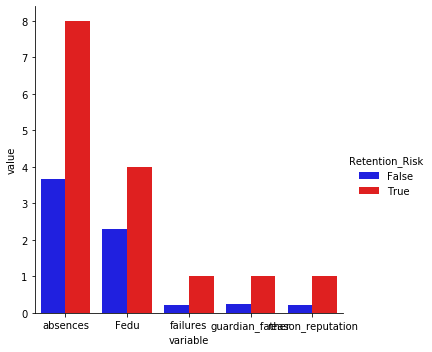

Student ID: 603


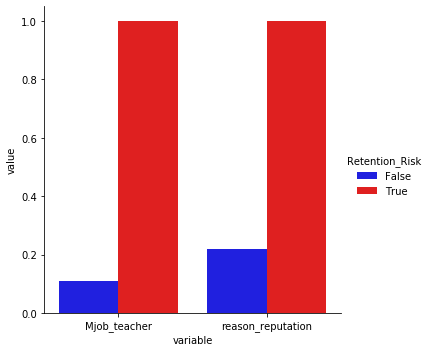

Student ID: 514


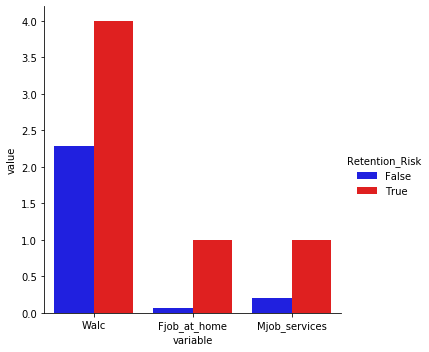

Student ID: 568


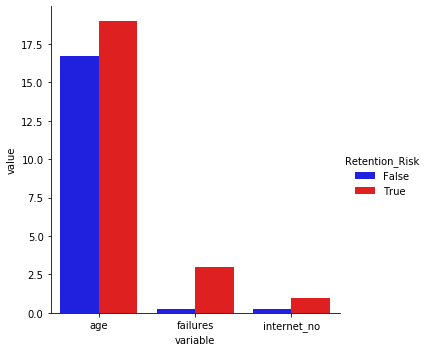

Student ID: 440


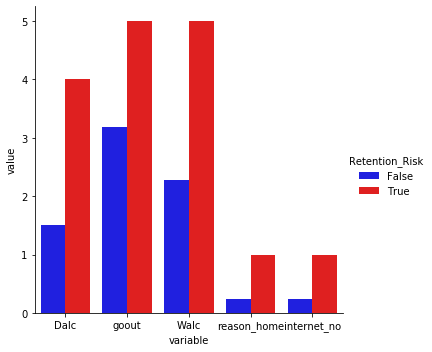

Student ID: 443


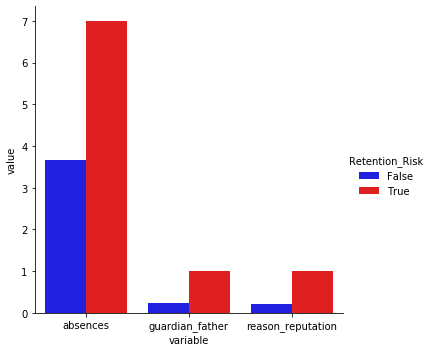

Student ID: 155


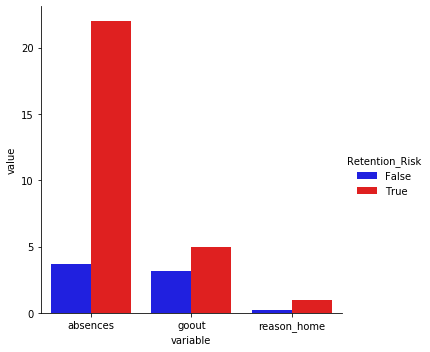

Student ID: 248


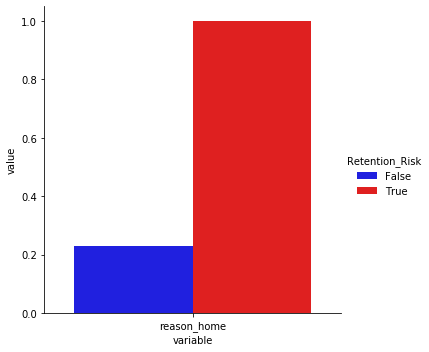

Student ID: 494


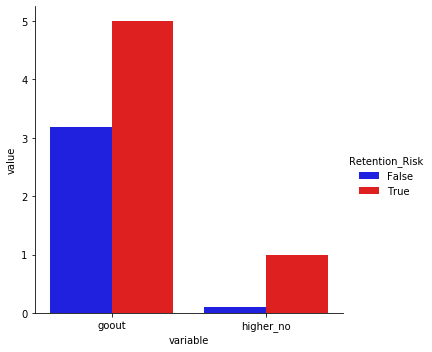

Student ID: 563


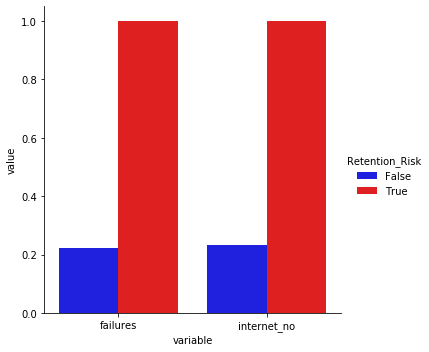

Student ID: 432


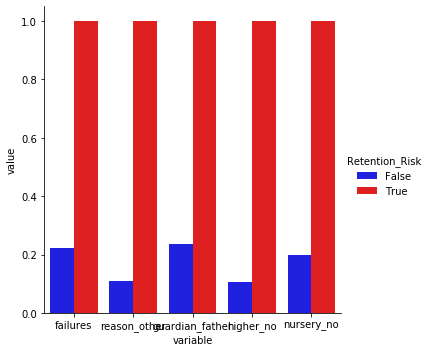

Student ID: 583


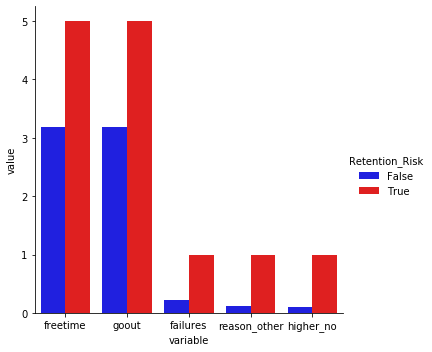

Student ID: 370


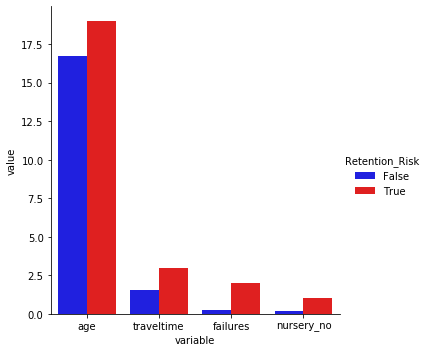

Student ID: 256


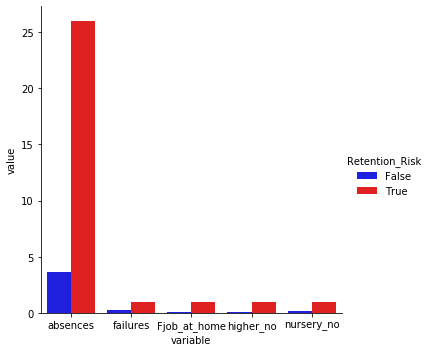

In [43]:
# See which feature they landed well below or well above peers
upper_limit_threshold = 0.75

for index, row in predicted_students_in_trouble.iterrows():
    student_id = index
    important_above_features = []
 
    for feat in key_features:
        if row[feat] > df[feat].quantile(upper_limit_threshold):
            important_above_features.append(feat)
            
        
    # create new data set for this student
    at_risk_student = pd.DataFrame(row[important_above_features]).T
    at_risk_student['Retention_Risk'] = True
    student_mean = pd.DataFrame(df[important_above_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    student_profile = pd.concat([at_risk_student,student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
    
    print('Student ID:', student_id)
    sns.catplot(x='variable', y='value', hue='Retention_Risk',data=student_profile, kind='bar', 
                palette=sns.color_palette(['blue', 'red']))
    plt.show()